<a href="https://colab.research.google.com/github/anupsen00/Predicting-Price-Hike-with-Sources-using-Different-Machine-Learning-Algorithms/blob/main/BLSTM_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BLSTM

'Vol.': Missing values are filled with the median.
Numeric columns ('Price', 'Open', 'High', 'Low'): Iterative imputation is applied.
'Change %': Missing values are filled with the mean as an example.
Other Columns: Rows with missing values are dropped

<ipython-input-1-38b40a03d54c>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


X_train shape: (2927, 60, 5), y_train shape: (2927,)
X_test shape: (732, 60, 5), y_test shape: (732,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 60, 100)             │          22,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 60, 100)             │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,301 (559.77 KB)

 Trainable params: 143,301 (559.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.0117 - val_loss: 0.0011
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0020 - val_loss: 7.9016e-04
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0017 - val_loss: 6.4618e-04
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0016 - val_loss: 6.1765e-04
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0014 - val_loss: 5.9224e-04
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0012 - val_loss: 4.5629e-04
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0012 - val_loss: 5.4938e-04
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0012 - val_loss: 4.4008e-04
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0011 - val_loss: 4.5514e-04
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0010 - val_loss: 3.7290e-04
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0011 - val_loss: 4.3652e-04
Epoch 12/10

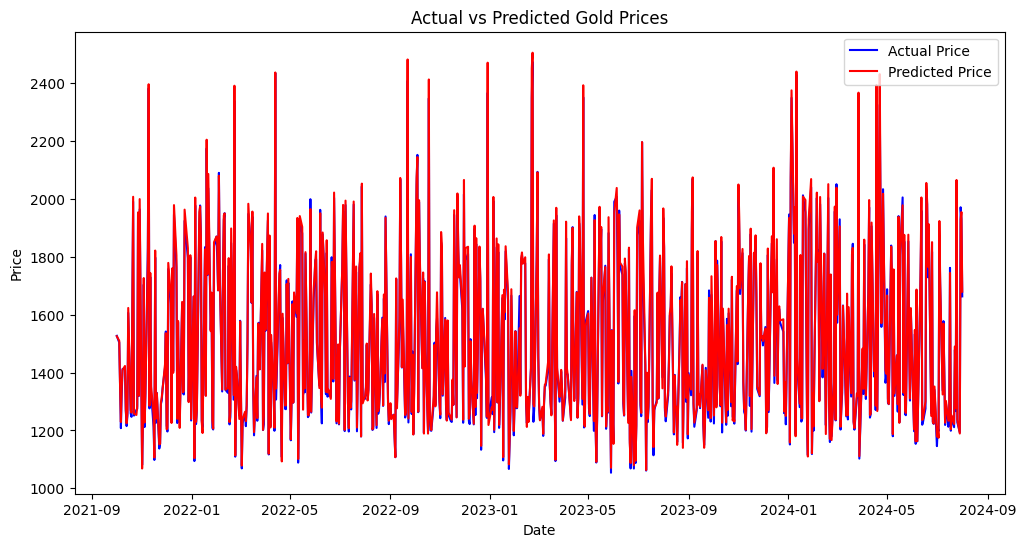

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
file_path = '/content/Gold Futures Historical Data (2).csv'
data = pd.read_csv(file_path)

# Data Preprocessing
def convert_volume(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        else:
            return float(value.replace(',', ''))
    return value  # If it's already a float

# Apply the conversion function to the 'Vol.' column
data['Vol.'] = data['Vol.'].apply(convert_volume)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Convert other columns to numeric
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].astype(str).str.replace(',', '', regex=False)
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle the 'Change %' column
data['Change %'] = data['Change %'].astype(str).str.strip().str.replace('%', '', regex=False)
data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')

# Check and handle missing values for each column
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if col == 'Vol.':  # Fill 'Vol.' with median
            data[col].fillna(data[col].median(), inplace=True)
        elif col in ['Price', 'Open', 'High', 'Low']:  # Numeric columns with iterative imputation
            imputer = IterativeImputer()
            data[[col]] = imputer.fit_transform(data[[col]])
        elif col == 'Change %':  # Choose an appropriate fill strategy for 'Change %'
            data[col].fillna(data[col].mean(), inplace=True)  # Here using mean as an example
        else:
            data.dropna(subset=[col], inplace=True)  # Drop rows with missing data in non-essential columns

# Drop rows with any remaining missing values (e.g., in 'Date' or other non-numeric columns)
data.dropna(inplace=True)

# Sort by date
data.sort_values(by='Date', inplace=True)

# Feature Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Price', 'Open', 'High', 'Low', 'Vol.']])

# Create sequences for BLSTM model
X = []
y = []

window_size = 60

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i])
    y.append(scaled_data[i, 0])  # Predicting 'Price' column

X = np.array(X)
y = np.array(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for BLSTM (already done by creating sequences)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Build BLSTM model
model = Sequential()

model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Model evaluation
y_pred = model.predict(X_test)

# Reverse the scaling for better interpretability
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]
y_pred_actual = scaler.inverse_transform(np.concatenate((y_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate performance metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Convert regression output to binary classification based on a threshold
price_threshold = np.median(y_test_actual)  # Threshold could be median or any chosen value
y_test_binary = (y_test_actual > price_threshold).astype(int)
y_pred_binary = (y_pred_actual > price_threshold).astype(int)

# Calculate classification metrics
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(y_pred_actual):], y_pred_actual, color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.show()


Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.2772e-04 - val_loss: 1.5951e-04
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.7510e-04 - val_loss: 1.7029e-04
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.9384e-04 - val_loss: 1.6858e-04
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 4.7927e-04 - val_loss: 3.9311e-04
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8682e-04 - val_loss: 1.5480e-04
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.4451e-04 - val_loss: 2.4384e-04
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.9153e-04 - val_loss: 1.7507e-04
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.1252e-04 - val_loss: 2.6395e-04
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 4.6450e-04 - val_loss: 2.0010e-04
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.8640e-04 - val_loss: 1.6373e-04
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss

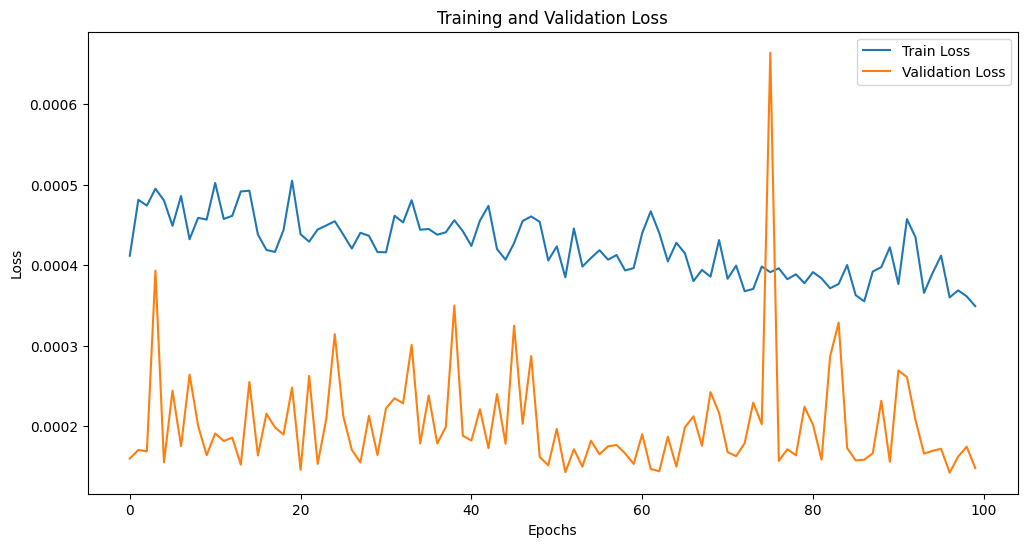

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Squared Error: 302.6919692977748
R^2 Score: 0.9966400089026737
Precision: 0.981081081081081
Recall: 0.9918032786885246
F1 Score: 0.9864130434782609
Accuracy: 0.9863387978142076
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━

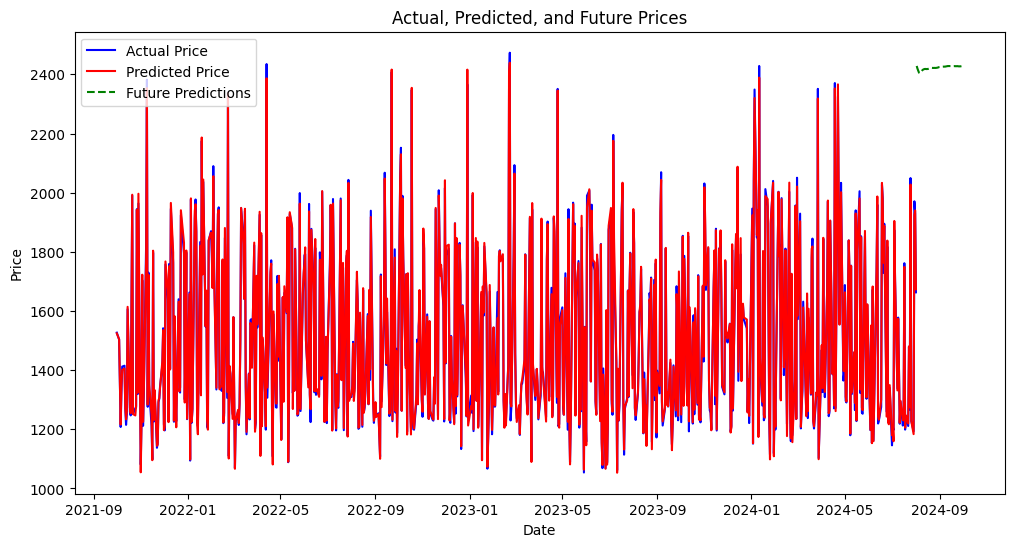

In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Model evaluation
y_pred = model.predict(X_test)

# Reverse the scaling for better interpretability
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]
y_pred_actual = scaler.inverse_transform(np.concatenate((y_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate performance metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Convert regression output to binary classification based on a threshold
price_threshold = np.median(y_test_actual)  # Threshold could be median or any chosen value
y_test_binary = (y_test_actual > price_threshold).astype(int)
y_pred_binary = (y_pred_actual > price_threshold).astype(int)

# Calculate classification metrics
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Predict future prices for the next 60 days
# Create input sequence from the latest available data
last_sequence = scaled_data[-window_size:]

# Initialize future predictions array
future_predictions = []

for _ in range(60):
    # Reshape for model prediction
    last_sequence_reshaped = np.expand_dims(last_sequence, axis=0)
    future_price = model.predict(last_sequence_reshaped)

    # Append the prediction to the future_predictions list
    future_predictions.append(future_price[0, 0])

    # Update the sequence by appending the predicted price and removing the oldest data
    last_sequence = np.append(last_sequence[1:], [[future_price[0, 0], last_sequence[-1, 1], last_sequence[-1, 2], last_sequence[-1, 3], last_sequence[-1, 4]]], axis=0)

# Reverse scaling for future predictions
future_predictions_scaled = scaler.inverse_transform(np.concatenate((np.array(future_predictions).reshape(-1, 1), np.tile(scaled_data[-1, 1:], (60, 1))), axis=1))[:, 0]

# Plot Actual vs Predicted values and Future Predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(y_pred_actual):], y_pred_actual, color='red', label='Predicted Price')
plt.plot(pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=60, freq='D'), future_predictions_scaled, color='green', linestyle='--', label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual, Predicted, and Future Prices')
plt.legend()
plt.show()


X_train shape: (2927, 60, 5), y_train shape: (2927,)
X_test shape: (732, 60, 5), y_test shape: (732,)


<ipython-input-3-af96c184c19e>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Vol.'].fillna(0, inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional)      │ (None, 60, 100)             │          22,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 60, 100)             │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,301 (559.77 KB)

 Trainable params: 143,301 (559.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0197 - val_loss: 0.0011
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0024 - val_loss: 8.5954e-04
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0018 - val_loss: 6.7965e-04
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0017 - val_loss: 9.0496e-04
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0017 - val_loss: 9.4009e-04
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0013 - val_loss: 4.9302e-04
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0013 - val_loss: 4.4312e-04
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0014 - val_loss: 4.8192e-04
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0013 - val_loss: 4.6839e-04
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0010 - val_loss: 5.6282e-04
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0012 - val_loss: 8.4955e-04
Epoch 12/100

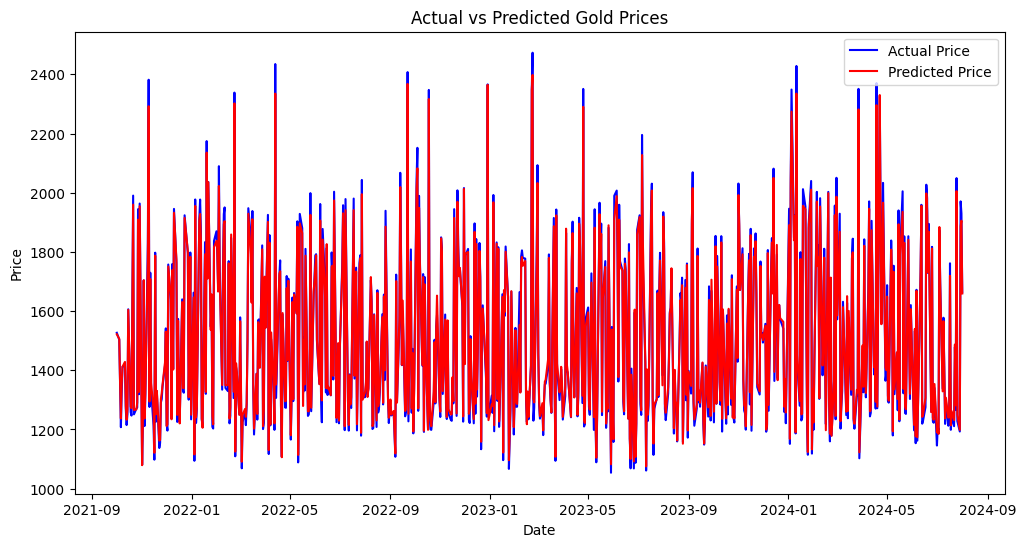

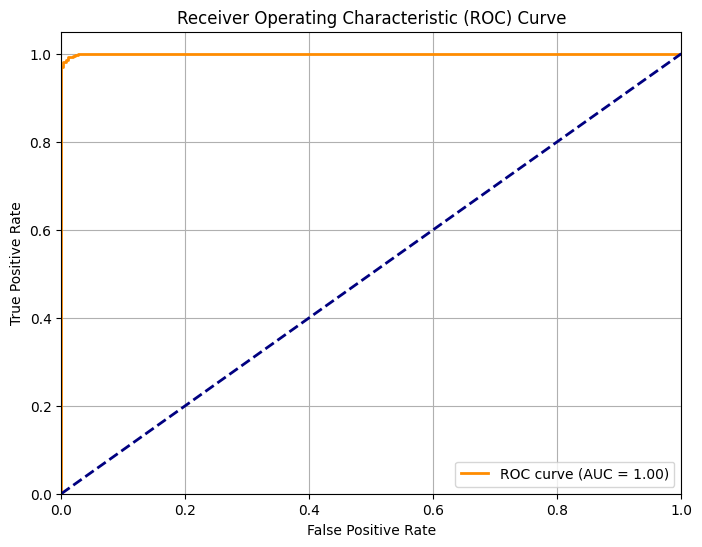

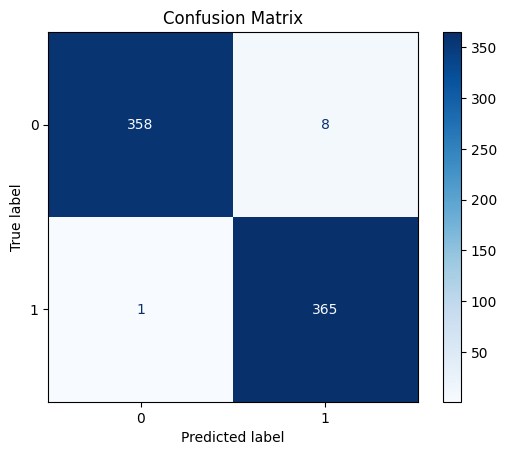

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/Gold Futures Historical Data (2).csv'
data = pd.read_csv(file_path)

# Data Preprocessing
def convert_volume(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        else:
            return float(value.replace(',', ''))
    return value  # If it's already a float

# Apply the conversion function to the 'Vol.' column
data['Vol.'] = data['Vol.'].apply(convert_volume)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Convert other columns to numeric
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].astype(str).str.replace(',', '', regex=False)
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle the 'Change %' column
data['Change %'] = data['Change %'].astype(str).str.strip().str.replace('%', '', regex=False)
data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')

# Handle missing values in 'Vol.' column
data['Vol.'].fillna(0, inplace=True)

# Drop rows with any remaining missing values
data.dropna(inplace=True)

# Sort by date
data.sort_values(by='Date', inplace=True)

# Feature Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Price', 'Open', 'High', 'Low', 'Vol.']])

# Create sequences for BLSTM model
X = []
y = []

window_size = 60

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i])
    y.append(scaled_data[i, 0])  # Predicting 'Price' column

X = np.array(X)
y = np.array(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for BLSTM (already done by creating sequences)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Build BLSTM model
model = Sequential()

model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Model evaluation
y_pred = model.predict(X_test)

# Reverse the scaling for better interpretability
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]
y_pred_actual = scaler.inverse_transform(np.concatenate((y_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

# Calculate performance metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Convert regression output to binary classification based on a threshold
price_threshold = np.median(y_test_actual)  # Threshold could be median or any chosen value
y_test_binary = (y_test_actual > price_threshold).astype(int)
y_pred_binary = (y_pred_actual > price_threshold).astype(int)

# Calculate classification metrics
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(y_pred_actual):], y_pred_actual, color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_actual)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


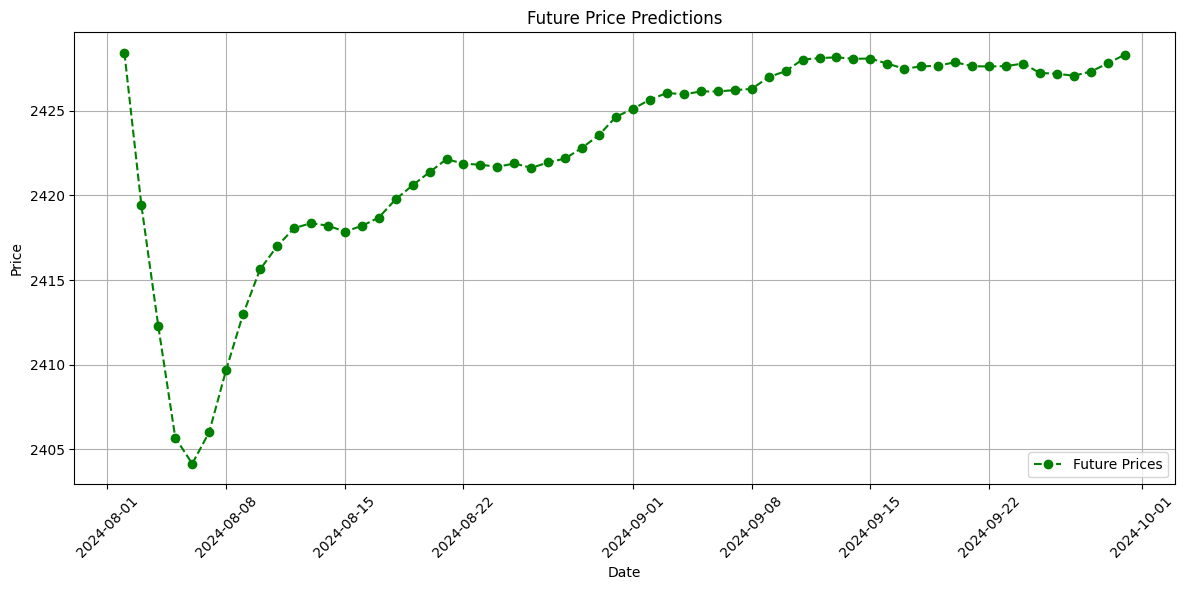

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create dates for future predictions
future_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=60, freq='D')

# Plot Future Predictions
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions_scaled, color='green', linestyle='--', marker='o', label='Future Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Future Price Predictions')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
